# Chua's circuit
[Chua's circuit](https://en.wikipedia.org/wiki/Chua%27s_circuit) (also known as a Chua circuit) is a simple electronic circuit that exhibits classic chaos theory behavior. This means roughly that it is a "nonperiodic oscillator"; it produces an oscillating waveform that, unlike an ordinary electronic oscillator, never "repeats". It was invented in 1983 by Leon O. Chua, who was a visitor at Waseda University in Japan at that time. The ease of construction of the circuit has made it a ubiquitous real-world example of a chaotic system, leading some to declare it "a paradigm for chaos".


http://www.chuacircuits.com/diagram.php

https://github.com/brendabrandy/chuacircuit/blob/master/chuacircuit.py

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [10]:
#coefficients for double scroll attractor
c1 = 1.0 / 9.0
c2 = 1.0
G = 0.7
L = 1.0 / 7.0

In [17]:
#for the double scroll attractor
r_array = np.array([ 0.15264, -0.02281 ,0.38127  ],float)

In [11]:
#Negative Resistor current, piecewise function voltage should be vc1
#for double scroll
def g(v):
    if v > -1 and v < 1:
        return -0.8* v
    elif v > 1: #if v is bigger than 1
        return -0.8 - 0.5*(v-1.0)
    else: #if v is less than -1
        return 0.8 - 0.5*(v+1.0)

In [19]:
#define vector function f
def f(r_array,t):
    x = r_array[0] #voltage across c1
    y = r_array[1] #voltage across c2
    z = r_array[2] #current across L
    fx = (G*(y-x) - g(x) ) / c1
    fy = (G*(x - y) + z) / c2
    fz = - y / L
    return np.array([fx,fy,fz],float)

In [20]:
#initial condition and step size
t_i = 0.0
#t_f = 50.0
t_f = 300.0
N = 10000.0
h = (t_f-t_i) / N

In [21]:
tpoints = np.arange(t_i,t_f,h)
xpoints = []
ypoints = []
zpoints = []

#fourth order RK loop
for t in tpoints:
    xpoints.append(r_array[0])
    ypoints.append(r_array[1])
    zpoints.append(r_array[2])
    k1 = h*f(r_array,t)
    k2 = h*f(r_array+0.5*k1, t+0.5*h)
    k3 = h*f(r_array+0.5*k2, t+0.5*h)
    k4 = h*f(r_array+k3, t+h)
    
    r_array += (k1+2*k2+2*k3+k4)/6.0

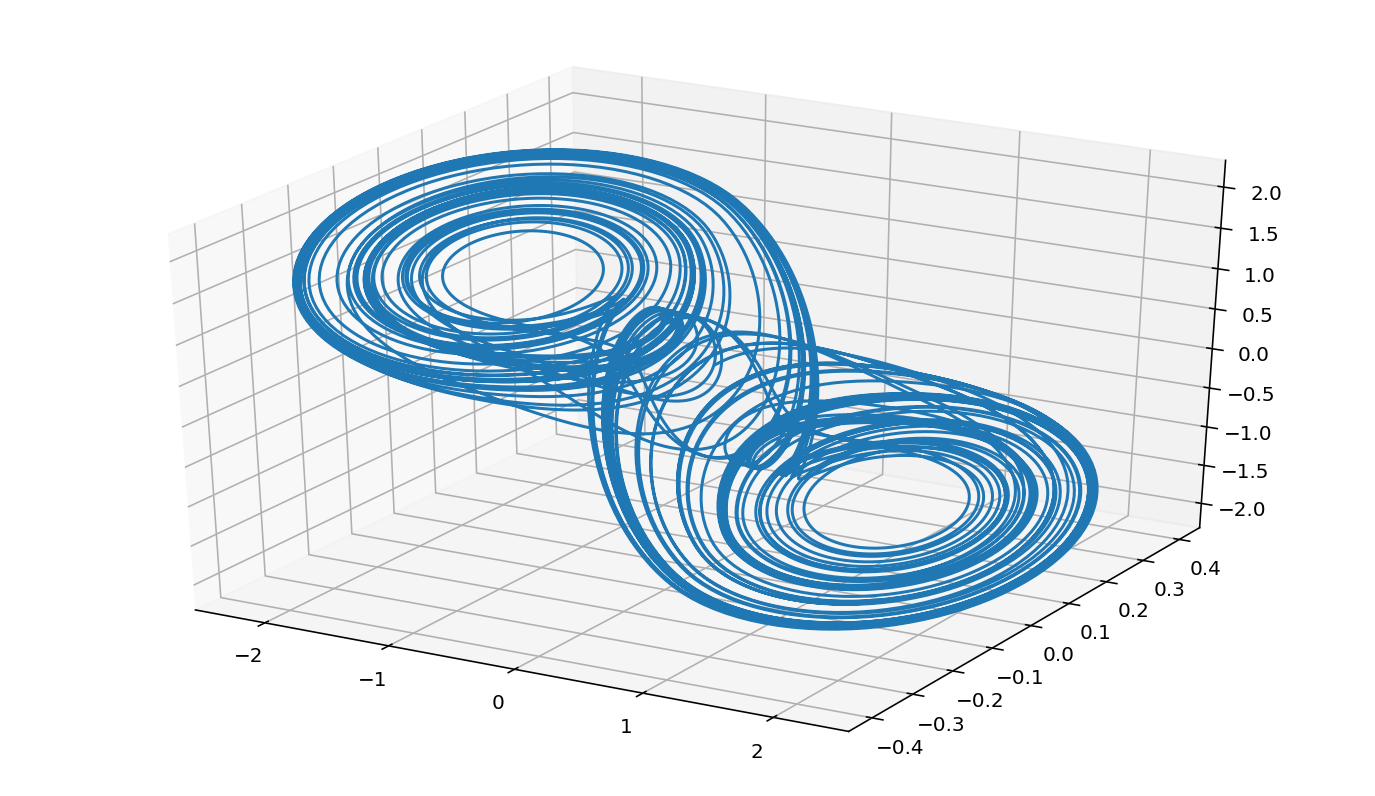

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xpoints, ypoints, zpoints)
plt.show()

## old code and examples below here

In [2]:
def chua(st, t):
    s = 10.0
    p = 28.0
    b = 8.0/3.0
    
    x0 = st[0] # x displacement
    y0 = st[1] # y displacement
    z0 = st[2] # z displacement
    
    xd = s*(y0-x0)
    yd = (p-z0)*x0 - y0
    zd = x0*y0 - b*z0
    
    return xd, yd, zd

In [3]:
init = [2.0, 3.0, 4.0]
t = np.arange(0.0, 60.0, 0.01)

st = odeint(chua, init, t)

lor = st

x = st[:,0]
y = st[:,1]
z = st[:,2]

In [4]:
from mpl_toolkits.mplot3d import Axes3D

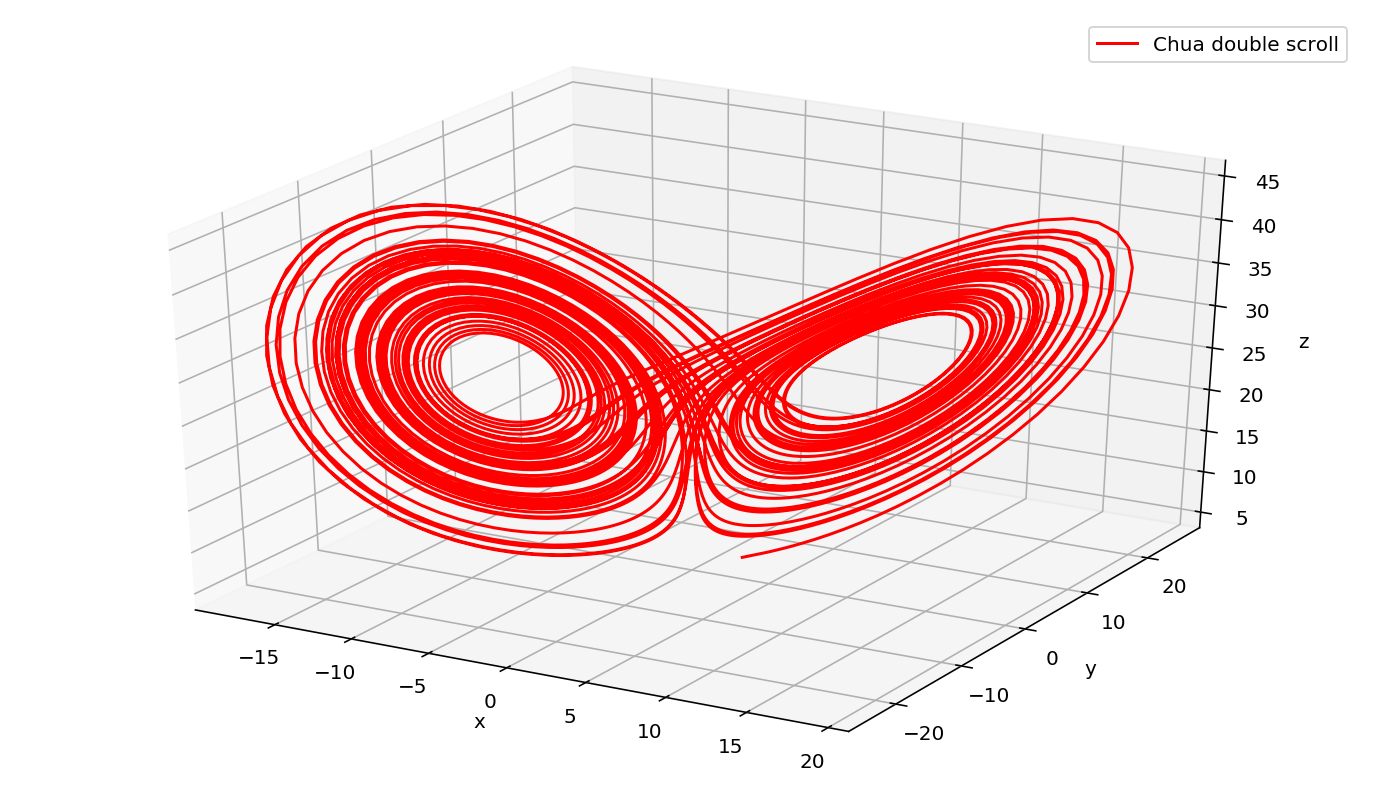

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, 'r', label='Chua double scroll')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.savefig('Chua_double_scroll.png', format='png', dpi=400)

Integration successful.


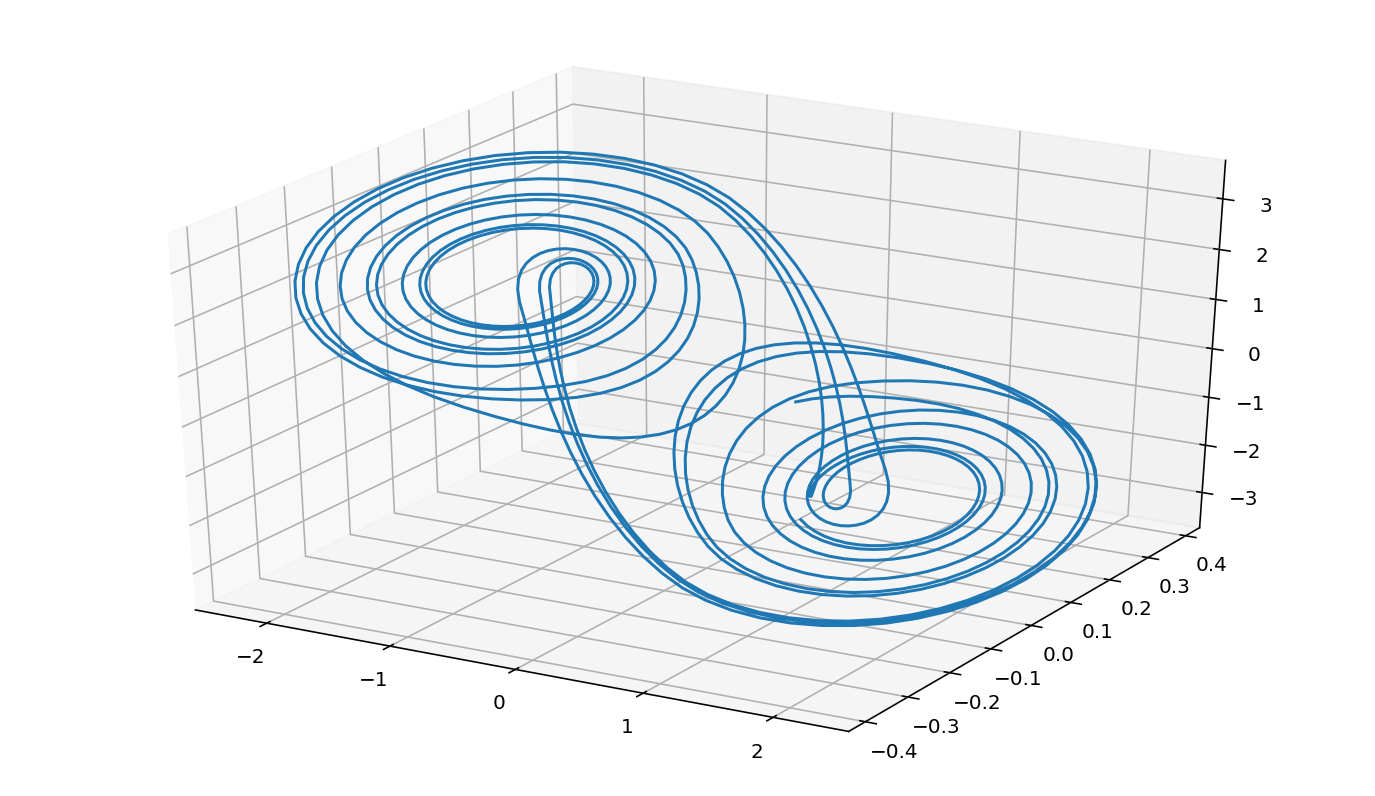

In [8]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#define universal variables
c0 = 15.6
c1 = 1.0
c2 = 28.0
m0 = -1.143
m1 = -0.714

#just a little extra, quite unimportant
def f(x):
    f = m1*x+(m0-m1)/2.0*(abs(x+1.0)-abs(x-1.0))
    return f

#the actual function calculating
def dH_dt(H, t=0):
    return np.array([c0*(H[1]-H[0]-f(H[0])),
                  c1*(H[0]-H[1]+H[2]),
                  -c2*H[1]])



#computational time steps
t = np.linspace(0, 30, 1000)
#x, y, and z initial conditions
H0 = [0.7, 0.0, 0.0]

H, infodict = integrate.odeint(dH_dt, H0, t, full_output=True)

print(infodict['message'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(H[:,0], H[:,1], H[:,2])
plt.show()